In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
from voicedata import voicedata
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
vtrainfile = 'vtrain_200'
vtestfile  = 'vtest_200'
(X_train, X_test,
genc, g_train, g_train_enc, g_train_cat, g_test, g_test_enc, g_test_cat,
nenc, n_train, n_train_enc, n_train_cat, n_test, n_test_enc, n_test_cat,
ienc, i_train, i_train_enc, i_train_cat, i_test, i_test_enc, i_test_cat) = voicedata(vtrainfile, vtestfile)


(6750, 4)
(2250, 4)


In [3]:
print(X_train.shape) 
print(X_test.shape) 
print(g_train_cat.shape) 
print(g_test_cat.shape) 
print(n_train_cat.shape) 
print(n_test_cat.shape) 
print(i_train_cat.shape) 
print(i_test_cat.shape) 

(6750, 40)
(2250, 40)
(6750, 2)
(2250, 2)
(6750, 17)
(2250, 17)
(6750, 200)
(2250, 200)


# Build Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense

def run_model(inputdim, outputdim, X_train, y_train_cat, e, ulist):
    # Create model and add layers
    model = Sequential()
    model.add(Dense(units=ulist[0], activation='relu', input_dim=inputdim))
    for u in ulist[1:]:
        model.add(Dense(units=u, activation='relu'))
    model.add(Dense(units=outputdim, activation='softmax'))

    # Compile and fit the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(
        X_train,
        y_train_cat,
        epochs=e,
        shuffle=True,
        verbose=0)
    return model

def check_model(model, X_test, y_test_cat, yenc, y_test, count):
    model_loss, model_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
    
    encoded_predictions = model.predict_classes(X_test[:count])
    prediction_labels = yenc.inverse_transform(encoded_predictions)
    print(f"Predicted classes: {prediction_labels}")
    print(f"Actual Labels: {list(y_test[:count])}")

In [6]:
inputsize = X_train.shape[1]
g_outputsize = g_train_cat.shape[1]
loss_list = []
acc_list = []
for time in range(50, 501, 50):
    gmodel = run_model(inputsize, g_outputsize, X_train, g_train_cat, time, [200, 100, 100])
    model_loss, model_accuracy = gmodel.evaluate(X_test, g_test_cat, verbose=2)
    loss_list.append(model_loss)
    acc_list.append(model_accuracy)

nlist = [
    [100, 100],
    [100, 100, 100],
    [200, 100, 100],
]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [7]:
check_model(gmodel, X_test, g_test_cat, genc, g_test, 10)

Normal Neural Network - Loss: 0.28008743885683485, Accuracy: 0.9728888888888889
Predicted classes: ['m' 'm' 'f' 'f' 'm' 'm' 'm' 'f' 'f' 'f']
Actual Labels: ['m', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'f']


In [8]:
n_outputsize = n_train_cat.shape[1]
nmodel = run_model(inputsize, n_outputsize, X_train, n_train_cat, 100, [200, 200, 100])

In [9]:
check_model(nmodel, X_test, n_test_cat, nenc, n_test, 10)

Normal Neural Network - Loss: 1.6081173674265543, Accuracy: 0.8191111112170749
Predicted classes: ['USA' 'USA' 'USA' 'USA' 'USA' 'USA' 'UK' 'USA' 'USA' 'USA']
Actual Labels: ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA']


In [10]:
i_outputsize = i_train_cat.shape[1]
imodel = run_model(inputsize, i_outputsize, X_train, i_train_cat, 200, [200, 600, 500, 500, 400, 200])

In [11]:
check_model(imodel, X_test, i_test_cat, ienc, i_test, 10)

Normal Neural Network - Loss: 4.4707077492607965, Accuracy: 0.6466666666666666
Predicted classes: ['Lavell_Crawford' 'Jeff_Daniels' 'Kelly_Rutherford' 'Jillian_Michaels'
 'Hunter_Parrish' 'Usher_Raymond' 'John_Lloyd_Young' 'Nadia_Bjorlin'
 'Adrianne_Palicki' 'Jordana_Brewster']
Actual Labels: ['Lavell_Crawford', 'Jeff_Daniels', 'Kelly_Rutherford', 'Jillian_Michaels', 'Hunter_Parrish', 'Usher_Raymond', 'Johnathon_Schaech', 'Nadia_Bjorlin', 'Adrianne_Palicki', 'Jordana_Brewster']


TypeError: savefig() missing 1 required positional argument: 'fname'

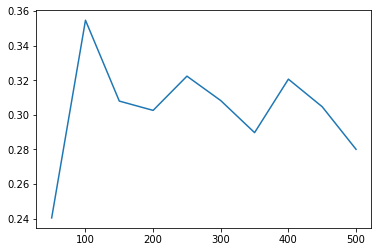

In [12]:
plt.plot(range(50,501,50),loss_list)
plt.savefig()

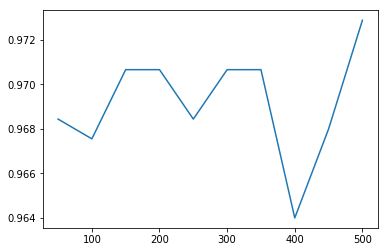

In [13]:
 plt.plot(range(50,501,50),acc_list)